In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np 
from scipy.stats import uniform, randint


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# Käytetään Kaggle API:tä datasetin lataamiseen.
!kaggle datasets download -d laotse/credit-risk-dataset --quiet

In [4]:
# Ladattu tiedosto on .zip-muodossa. Ladataan tiedoston purkamista varten
# Pythonin zipfile-kirjasto.
import zipfile
import pandas as pd


# Määritellään avattava tiedosto ja avatun tiedoston sijoitus
file_to_unzip = "credit-risk-dataset.zip"
directory_to_extract_to = r"C:\Users\Omistaja\JODA_2022\harkkatyö\datasets"

# Avataan .zip-tiedosto ZipFile-funktiolla
with zipfile.ZipFile(file_to_unzip, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [5]:
# luetaan .csv-tiedosto Pandasin avulla
credit_data = pd.read_csv("harkkatyö/datasets/credit_risk_dataset.csv")

In [6]:
credit_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [51]:
credit_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [49]:
# Valitaan numeeriset muuttujat
num_cols = pd.DataFrame(credit_data[credit_data.select_dtypes(include=['float', 'int']).columns])
# Poistetaan "loan_status"-sarake (label)
num_cols_graph = num_cols.drop(['loan_status'], axis=1)

C:\Users\Omistaja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Omistaja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Omistaja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibi

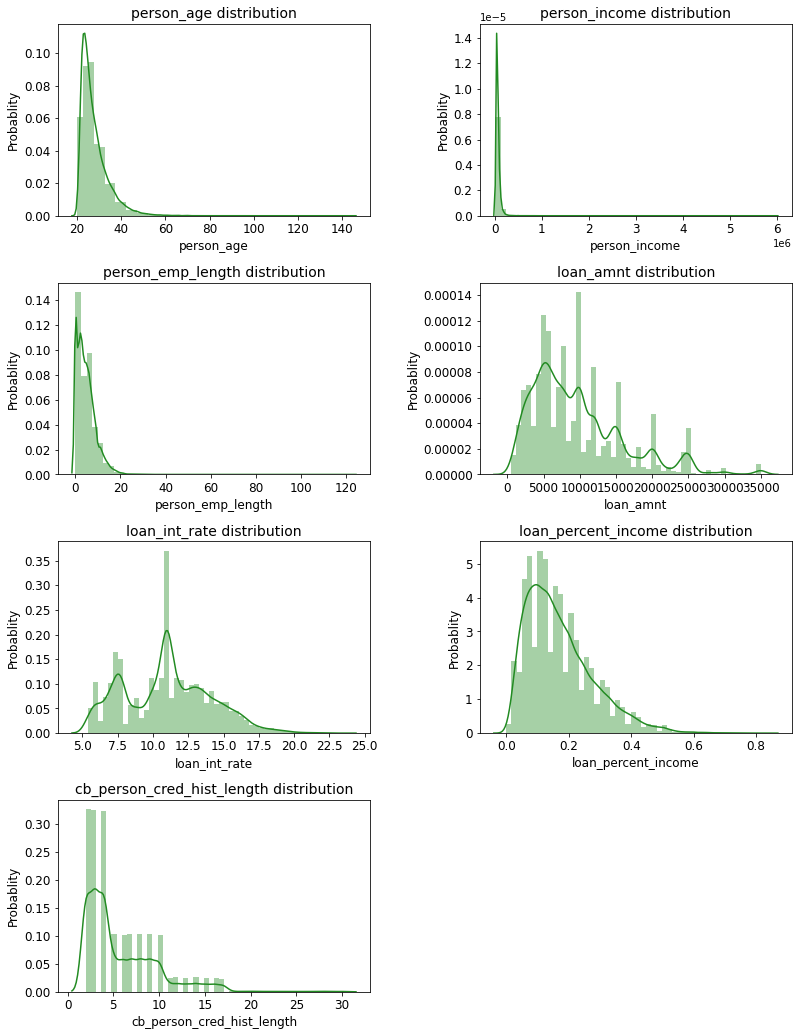

In [73]:
# Visualisoidaan kunkin numeerisen muuttujan jakauma kertymäfunktiona
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_graph.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_graph[col], color='forestgreen')
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)


In [30]:
credit_data["loan_status"].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

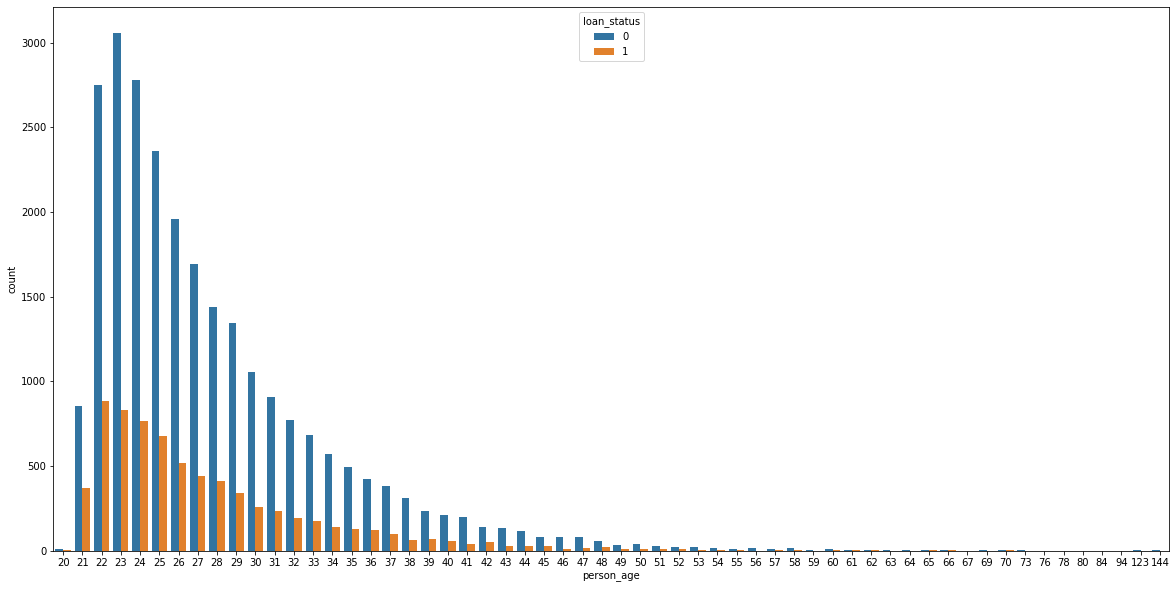

In [54]:
# Visualisoidaan nostettujen lainojen määrärät ja niiden tulemat (default vai ei)
# lainanottajan iän suhteen.
plt.figure(figsize=[20,10])
sns.countplot(x = 'person_age', hue= 'loan_status', data=credit_data);

In [59]:
# Jaetaan datasetti kahteen osaan "loan_status" perusteella
not_defaulted = credit_data[credit_data["loan_status"] == 0]
defaulted = credit_data[credit_data["loan_status"] == 1]

<AxesSubplot:xlabel='loan_intent', ylabel='Count'>

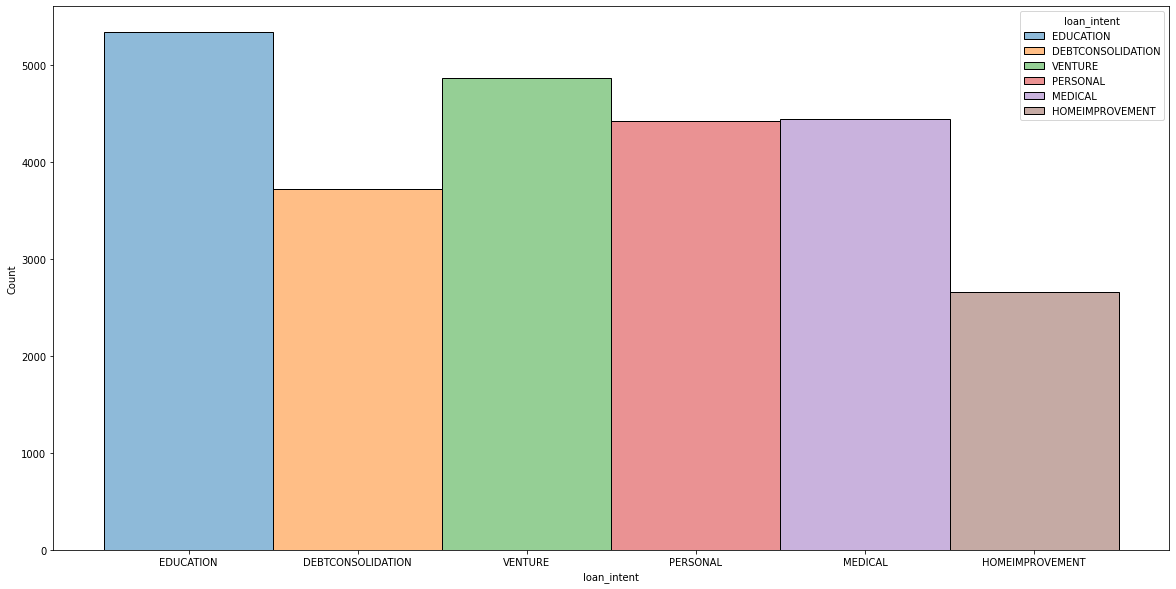

In [71]:
plt.figure(figsize=[20,10])
sns.histplot(x = 'loan_intent', hue= 'loan_intent', data=not_defaulted)

<AxesSubplot:xlabel='loan_intent', ylabel='Count'>

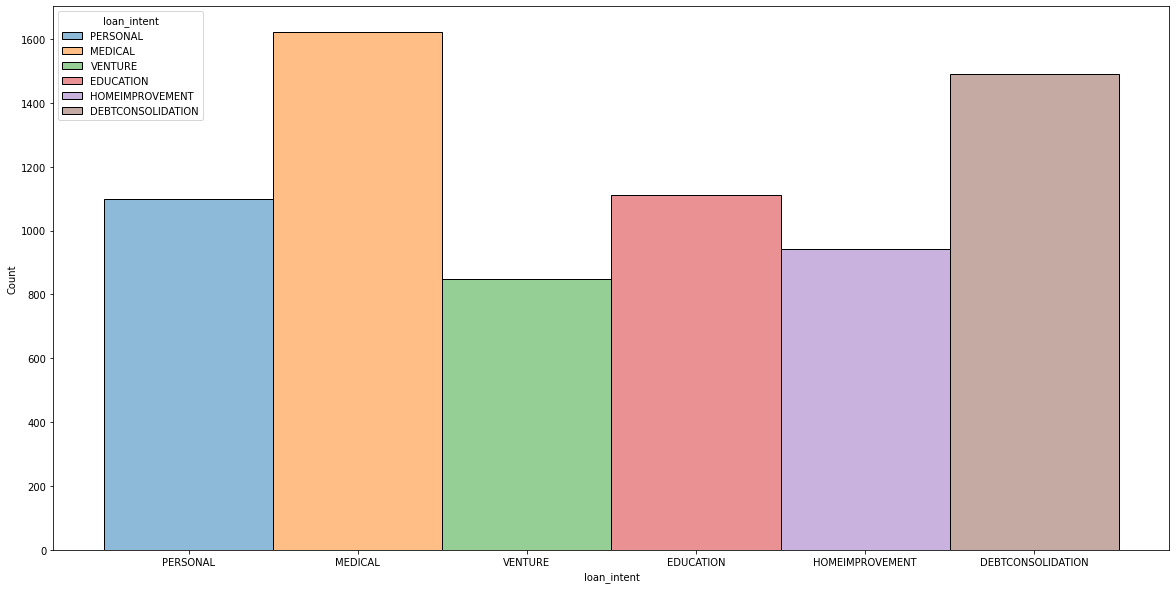

In [70]:
plt.figure(figsize=[20,10])
sns.histplot(x = 'loan_intent', hue= 'loan_intent', data=defaulted)

In [23]:
# Korvataan työuran pituutta ja lainan korkoa kuvaavat tyhjät arvot tyyppiarvoilla
credit_data["person_emp_length"].fillna(credit_data["person_emp_length"].mode()[0], inplace=True)
credit_data["loan_int_rate"].fillna(credit_data["loan_int_rate"].median(), inplace=True)

In [25]:
# Tarkistetaan operaatio
credit_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [26]:
# Pudotetaan oudokkeja sisältävät rivit datasetistä
credit_data_clean = credit_data[credit_data['person_age']<=100]
credit_data_clean = credit_data_clean[credit_data_clean['person_emp_length']<=60]
credit_data_clean = credit_data_clean[credit_data_clean['person_income']<=4e6]

In [156]:
num_cols = pd.DataFrame(credit_data_clean[credit_data_clean.select_dtypes(include=['float', 'int']).columns])

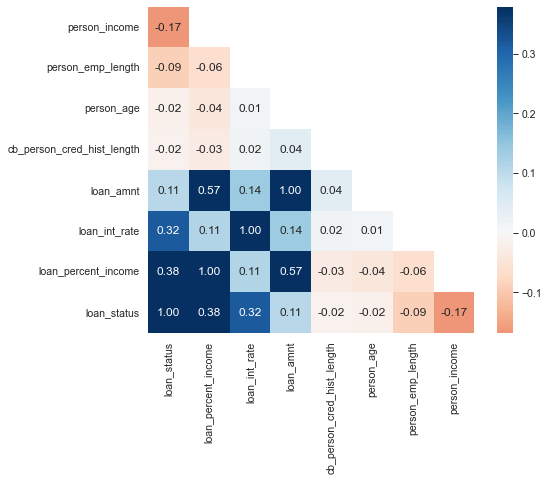

In [160]:
corr = num_cols.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})

In [79]:
credit_data_clean = pd.get_dummies(credit_data_clean)
credit_data_clean

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


### Koneoppiminen

In [137]:
# Erotetaan ennustettavat arvot (labels)
labels = credit_data_clean["loan_status"]
# Erotetaan piirteet
features = credit_data_clean.drop('loan_status',axis=1)
# Jaetaan opetus-ja testidataan
x_train, x_test, y_train, y_test = train_test_split(features, labels,
                                        random_state=12, test_size=.25)

In [138]:
# Valitaan käytettävät algoritmit
models = []
models.append(('Logistinen Regressio', LogisticRegression(solver='liblinear',
                                                          multi_class='ovr')))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree Luokittelija', DecisionTreeClassifier()))
# Arvioidaan kukin algoritmi
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Logistinen Regressio: 0.805690 (0.006197)
K-Nearest Neighbors: 0.830700 (0.005406)
Decision Tree Luokittelija: 0.886860 (0.005495)


In [139]:
# Valitaan Decision Tree Luokittelija, opetetaan malli
DTL = DecisionTreeClassifier().fit(x_train, y_train)
# Ennustetaan testidatan perusteella
predictions = DTL.predict(x_test)

In [140]:
# Arvioidaan ennusteet
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8928045186640472
[[5899  496]
 [ 377 1372]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6395
           1       0.73      0.78      0.76      1749

    accuracy                           0.89      8144
   macro avg       0.84      0.85      0.84      8144
weighted avg       0.90      0.89      0.89      8144



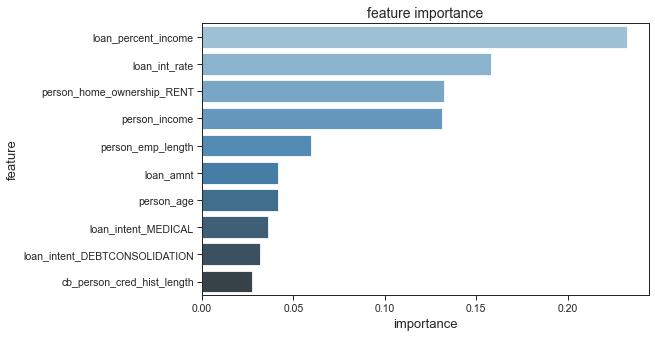

In [141]:
# Tutkitaan eri muuttujien merkittävyyttä lainan defaulttaamisen ennustamisessa
feature_importance = pd.DataFrame({'feature': x_train.columns, 
                                   'importance': DTL.feature_importances_})
new_features_data = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)

sns.set(context='paper', style='ticks',  font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)
figure, ax = plt.subplots(figsize=(8, 5))
ax=sns.barplot(data = new_features_data[:10],
              y='feature',
              x='importance',
              palette='Blues_d') # rocket, Blues_d
ax.set_title('feature importance', fontsize=14)
ax.set_xlabel('importance', fontsize=13)
ax.set_ylabel('feature', fontsize=13)
plt.show()

In [143]:
# Valitaan tärkeimmät muuttujat ja opetetaan malli uudelleen
new_features = new_features_data['feature'][0:20]
new_features_data = pd.DataFrame(credit_data_clean[new_features])
x_train1, x_test1, y_train1, y_test1 = train_test_split(new_features_data, labels, 
                                                        random_state=12, test_size=.25)

In [148]:
params = {
    "colsample_bytree": uniform(0.9, 0.1), # 0.9-1 0.9 is the lower bound, 0.1 is the range
    "gamma": uniform(0.2, 0.3),# 0.2-0.5
    "learning_rate": uniform(0.2, 0.2), # 0.2-0.4 
    "max_depth": randint(4, 6), # 4, 5, 6
    "n_estimators": randint(100, 300), # 100-300
    "subsample": uniform(0.9, 0.1) # 0.9-1
}

In [149]:
Random_CV = RandomizedSearchCV(DTL, param_distributions=params, random_state=12, 
                            n_iter=100, cv=3, verbose=2, n_jobs=16, return_train_score=True)

In [ ]:
RCV = Random_CV.fit(x_train1, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
predictions_1 = RCV.predict(x_test)